<h1 align="center">Tarea 2 Especializacion en estadistica aplicada</h1>


- Nombre: Mateo Orozco Baldovino
- Especialidad en Estadistica Aplicada UTB

## Caracteristicas del entorno de desarrollo:
- Para el presente trabajo yo agarre el dataset desde este link (https://archive.ics.uci.edu/dataset/320/student+performance).
- Estoy realizando el analisis de este dataset usando python en visual studio code y jupyter notebook.
- Para las librerias utilizo un entorno virtual creado con conda.

Esta tarea puede ser encontrada en este repositorio
[Github](https://github.com/TheMaorba/DataMining.git)

In [1]:
# Añadiendo librerías necesarias para trabajar con datos y visualización
import respuestas as rp
import pandas as pd
import numpy as np
from faltantes import ManejoFaltantes
from graficos import Graficos


Punto 1: Descargue y cargue los datos en su notebook, usando Pandas preferiblemente. Imprima para tener una idea de los datos.

In [2]:
df1 = pd.read_csv("D:\Documentos\Especialidad\DataMining\Tarea2\Dataset\estudiantes.csv")
df1.head(5)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel.y,freetime.y,goout.y,Dalc.y,Walc.y,health.y,absences.y,G1.y,G2.y,G3.y
0,GP,F,15,R,GT3,T,1,1,at_home,other,...,3,1,2,1,1,1,4,13,13,13
1,GP,F,15,R,GT3,T,1,1,other,other,...,3,3,4,2,4,5,2,13,11,11
2,GP,F,15,R,GT3,T,2,2,at_home,other,...,4,3,1,1,1,2,8,14,13,12
3,GP,F,15,R,GT3,T,2,4,services,health,...,4,3,2,1,1,5,2,10,11,10
4,GP,F,15,R,GT3,T,3,3,services,services,...,4,2,1,2,3,3,2,13,13,13


Punto 2: Calcule la cantidad de datos faltantes y luego si no tiene cree artificialmente datos faltantes.

In [3]:
rp.punto2(df1)

La cantidad de valores faltantes por columnas es de:
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
nursery         0
internet        0
guardian.x      0
traveltime.x    0
studytime.x     0
failures.x      0
schoolsup.x     0
famsup.x        0
paid.x          0
activities.x    0
higher.x        0
romantic.x      0
famrel.x        0
freetime.x      0
goout.x         0
Dalc.x          0
Walc.x          0
health.x        0
absences.x      0
G1.x            0
G2.x            0
G3.x            0
guardian.y      0
traveltime.y    0
studytime.y     0
failures.y      0
schoolsup.y     0
famsup.y        0
paid.y          0
activities.y    0
higher.y        0
romantic.y      0
famrel.y        0
freetime.y      0
goout.y         0
Dalc.y          0
Walc.y          0
health.y        0
absences.y      0
G1.y            0
G2.y            0
G3.y       

In [4]:
# Creando datos faltantes ya que actualmente no tiene y contar cuantos hay
df2 = ManejoFaltantes.crear_faltantes_columna(df1, 'age', 0.05)
df2.isna().sum()


school           0
sex              0
age             19
address          0
famsize          0
Pstatus          0
Medu             0
Fedu             0
Mjob             0
Fjob             0
reason           0
nursery          0
internet         0
guardian.x       0
traveltime.x     0
studytime.x      0
failures.x       0
schoolsup.x      0
famsup.x         0
paid.x           0
activities.x     0
higher.x         0
romantic.x       0
famrel.x         0
freetime.x       0
goout.x          0
Dalc.x           0
Walc.x           0
health.x         0
absences.x       0
G1.x             0
G2.x             0
G3.x             0
guardian.y       0
traveltime.y     0
studytime.y      0
failures.y       0
schoolsup.y      0
famsup.y         0
paid.y           0
activities.y     0
higher.y         0
romantic.y       0
famrel.y         0
freetime.y       0
goout.y          0
Dalc.y           0
Walc.y           0
health.y         0
absences.y       0
G1.y             0
G2.y             0
G3.y        

Punto 3: Use las metodologías vistas en clase para rellenar, o poner, datos en los lugares de los datos
faltantes.

## Manejar datos faltantes mediante la eliminacion

In [5]:
# Manejar los datos faltantes mediante la eliminacion o haciendole drop
df_sin_na = ManejoFaltantes.eliminar_faltantes(df2)
ManejoFaltantes.contar_faltantes(df_sin_na)


np.int64(0)

## Manejar datos faltantes mediante reemplazo por la media

Punto 4: Haga gráficos para evaluar la calidad de este llenado y las formas de las distribuciones.

 Distribucion de la edad utilizando el metodo de drop NA:


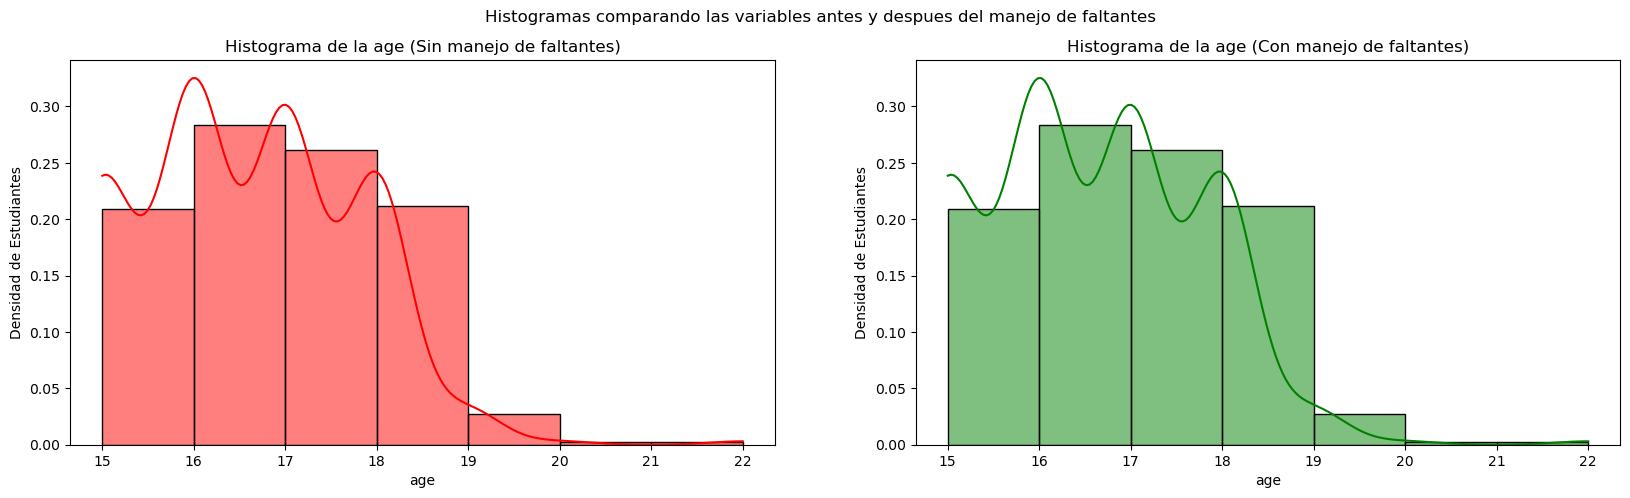

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#df2.hist('age', by='sex', bins=7); 
#df_sin_na.hist('age', by='sex', bins=7);

def crear_histograma_columna(df_sin_na, df2, age):
    fig, (ax1, ax2) = plt.subplots(figsize=(20,5), nrows=1, ncols=2)

    fig.suptitle("Histogramas comparando las variables antes y despues del manejo de faltantes")
    ax1.set_title(f"Histograma de la {age} (Sin manejo de faltantes)")
    ax1.set_xlabel(age)
    ax1.set_ylabel("Densidad de Estudiantes")
    sns.histplot(df2[age], bins=7, kde=True, ax=ax1, edgecolor='black', color='red', stat='density')

    ax2.set_title(f"Histograma de la {age} (Con manejo de faltantes)")
    ax2.set_xlabel(age)
    ax2.set_ylabel("Densidad de Estudiantes")
    sns.histplot(df_sin_na[age], bins=7, kde=True, ax=ax2, edgecolor='black', color='green', stat='density')
    plt.show()                                                  


crear_histograma_columna(df_sin_na, df2, 'age')








    

Punto 5: Escriba conclusiones acerca del proceso, ¿Qué metodología de imputación le sirvió mejor?

Punto 6: Determine si tiene datos outliers o datos extremos y diga cuales son y elimínelos. La
información para esta tarea está en el primer notebook.

Punto 7: Adicionalmente use los algoritmos que encontrará en el segundo notebook (linear_regresion) para inferir regresiones, determine parámetros, determine el grado de regresión o coeficiente de regresión (bondad de ajuste) y escriba conclusiones.

Punto 8: Conclusiones